<a href="https://colab.research.google.com/github/basselkassem/probabilistic-ml/blob/main/tf_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt


tfd = tfp.distributions
tfb = tfp.bijectors
print(tf.__version__)
print(tfp.__version__)

2.4.1
0.12.1


# Learn Distribution parameters

In [107]:
base_dist = tfd.MultivariateNormalDiag(loc = [0.0, 0.0], scale_diag = [1., 1.])

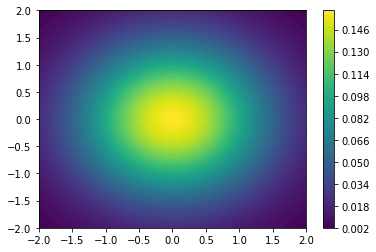

In [112]:
def draw_distribution(dist, lim = 2, samples_num = 100):
  x = np.linspace(-lim, lim, samples_num)
  xx, yy = np.meshgrid(x, x)
  xy = np.array([xx.ravel(), yy.ravel()]).T
  z = dist.prob(xy)
  z = np.array(z).T.reshape(samples_num, samples_num)
  plt.contourf(xx, yy, z, 100, )
  plt.colorbar()
  plt.show()

draw_distribution(base_dist)

In [226]:
trainable_dist = tfd.MultivariateNormalDiag(
    loc = tf.Variable([5., 5.]), scale_diag = tfp.util.TransformedVariable([2., 2.], tfb.Exp()),
)

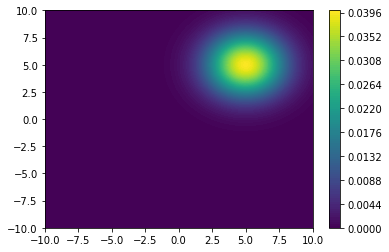

In [227]:
draw_distribution(trainable_dist, 10)

In [228]:
def nll(ytrue, dist):
  return -tf.reduce_mean(dist.log_prob(ytrue))

opt = tf.keras.optimizers.Adam(5e-2)
data = base_dist.sample(10000)

In [229]:
loss_list = []
epochs_num = 500
for epoch in range(epochs_num):
  with tf.GradientTape() as tape:
    tape.watch(trainable_dist.trainable_variables)
    loss = nll(data, trainable_dist)
  if epoch % 10 == 0:
    print(f'Epoch {epoch}, Loss {loss:.4}')
  loss_list.append(loss)
  grads = tape.gradient(loss, trainable_dist.trainable_variables)
  opt.apply_gradients(zip(grads, trainable_dist.trainable_variables))

Epoch 0, Loss 9.756
Epoch 10, Loss 6.29
Epoch 20, Loss 5.746
Epoch 30, Loss 5.672
Epoch 40, Loss 5.592
Epoch 50, Loss 5.469
Epoch 60, Loss 5.321
Epoch 70, Loss 5.155
Epoch 80, Loss 4.963
Epoch 90, Loss 4.735
Epoch 100, Loss 4.463
Epoch 110, Loss 4.14
Epoch 120, Loss 3.763
Epoch 130, Loss 3.356
Epoch 140, Loss 3.009
Epoch 150, Loss 2.869
Epoch 160, Loss 2.877
Epoch 170, Loss 2.868
Epoch 180, Loss 2.864
Epoch 190, Loss 2.863
Epoch 200, Loss 2.863
Epoch 210, Loss 2.863
Epoch 220, Loss 2.863
Epoch 230, Loss 2.863
Epoch 240, Loss 2.863
Epoch 250, Loss 2.863
Epoch 260, Loss 2.863
Epoch 270, Loss 2.863
Epoch 280, Loss 2.863
Epoch 290, Loss 2.863
Epoch 300, Loss 2.863
Epoch 310, Loss 2.863
Epoch 320, Loss 2.863
Epoch 330, Loss 2.863
Epoch 340, Loss 2.863
Epoch 350, Loss 2.863
Epoch 360, Loss 2.863
Epoch 370, Loss 2.863
Epoch 380, Loss 2.863
Epoch 390, Loss 2.863
Epoch 400, Loss 2.863
Epoch 410, Loss 2.863
Epoch 420, Loss 2.863
Epoch 430, Loss 2.863
Epoch 440, Loss 2.863
Epoch 450, Loss 2.863
E

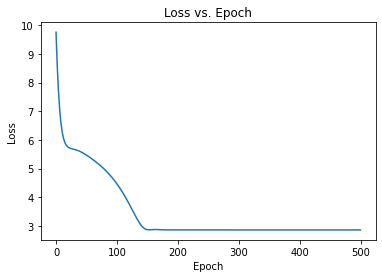

In [235]:
plt.plot(loss_list)
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

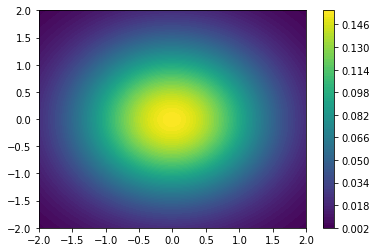

In [231]:
draw_distribution(trainable_dist)

In [240]:
print('Trained Distribution Mean:', trainable_dist.mean().numpy())
print('Trained Distribution Std:', trainable_dist.stddev().numpy())

Trained Distribution Mean: [-0.01139018 -0.00882498]
Trained Distribution Std: [1.0153819 1.0094666]


In [239]:
print('Base Distribution Mean:', base_dist.mean().numpy())
print('Base Distribution Std:', base_dist.stddev().numpy())

Base Distribution Mean: [0. 0.]
Base Distribution Std: [1. 1.]
